# Panorama general

Reto:
Las Pruebas Saber Pro son exámenes estandarizados que se administran en Colombia para evaluar la calidad y el nivel de conocimiento y competencias de los estudiantes de educación superior, es decir, de instituciones de educación superior como universidades y tecnológicos. Estas pruebas son parte de los esfuerzos del Gobierno de Colombia para monitorear y mejorar la calidad de la educación superior en el país.

Estas Pruebas constan cinco componentes genéricos, Inglés, Lectura Crítica, Competencias Ciudadanas, Razonamiento Cuantitativo y Comunicación Escrita.

Tu tarea será crear un modelo de clasificación que agrupe de forma precisa los estudiantes en los diferentes desempeños.



1.   bajo
2.   medio-bajo
3.   medio-alto
4.   alto





## Descripcion

El conjunto de datos contiene más de 50 columnas que describen de manera ostensible a cada estudiante.

Estas columnas incluyen:

Información socieconómica: Describen características socieconómicas del estudiante como su estrato, educación de sus padres, estrato, entre otras.

Información de instituciones: Describen las instituciones de donde provienen los estudiantes.

Información del estudiante: Describe particularidades del estudiante como su edad, que programa estudian, la modalidad de estudio, etc.

Así como muchos otros datos que ayudan a clasificar de manera precisa los niveles de desempeño

#Importacion de librerias que se usaran a lo largo del notebook

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import tensorflow as tf

# Importacion de datos

Se importa el dataset montado en drive, de las [Pruebas Saber Pro Colombia](https://www.kaggle.com/competitions/pruebas-saber-pro-colombia-isi2023/data) y con la funcion value_counts se puede ver que es un dataset estratificado sin importantes diferencias entre las categorias de la columna objetivo.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file_path = '/content/drive/Shareddrives/Inteligentes /train.csv'
df = pd.read_csv(file_path)

df['RENDIMIENTO_GLOBAL'].value_counts()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: RENDIMIENTO_GLOBAL, dtype: int64

# Limpieza de datos

Borramos la columna ID puesto que no dedberia tener correlacion con nuestra columna objetivo, porteriormente usamos la funcion isnull().sum() para saber la cantidad de registros nulos que teenmos por columnas.

In [ ]:
df= df.drop(columns=["ID"])
df.isnull().sum()

PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PRIVADO_LIBERTAD                 0
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                    0
dtype: int64

Se plantean dos posibles soluciones para el tema de los valores nulos, por un lado se borran usando la funcion dropna(), esto puede considerarse una buena idea puesto que tenemos mas 600k registros y no añadimos datos artificiales al conjunto de datos.

In [ ]:
df.dropna(inplace=True)

L a segunda alternativa que se propone para manejar los datos nulos, es hacer el uso de la moda de cada columna para asi reemplazar estos con la moda, esto puede servir para mantener el tamaño del dataset (entre mas datos mejor) pero a cambio se añade algo de ruido al colocar datos que puede que no deberian estar ahi.

In [ ]:
df.mode()

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto


In [ ]:
values = {"ESTU_VALORMATRICULAUNIVERSIDAD":"Entre 1 millón y menos de 2.5 millones","ESTU_HORASSEMANATRABAJA":"Más de 30 horas",
          "FAMI_ESTRATOVIVIENDA":"Estrato 2	","FAMI_TIENEINTERNET":"Si","FAMI_EDUCACIONPADRE":"Secundaria (Bachillerato) completa",
          "FAMI_TIENELAVADORA":"Si","FAMI_TIENEAUTOMOVIL":"No","ESTU_PAGOMATRICULAPROPIO":"No","FAMI_TIENECOMPUTADOR":"Si",
          "FAMI_TIENEINTERNET.1":"Si","FAMI_EDUCACIONMADRE":"Secundaria (Bachillerato) completa"}
df = df.fillna(value=values)

# Exploracion de datos

Hcemos graficos de barras para cada columna categorica con esto podemos ver como estan distribuidos nuestros datos.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


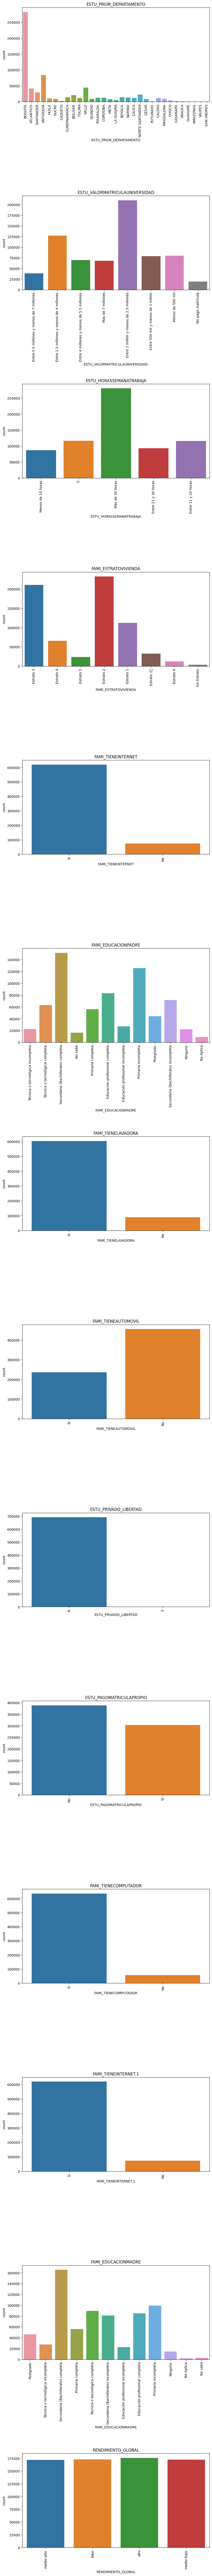

In [ ]:
import seaborn as sns
cols_cat = ['ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO',
            'FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET.1','FAMI_EDUCACIONMADRE','RENDIMIENTO_GLOBAL']

fig, ax = plt.subplots(nrows=14, ncols=1, figsize=(10,30))
#fig.tight_layout()
fig.subplots_adjust(bottom=7, top=10.5,   hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)

Se cambian las variables categoricas binarias por 0 y 1 segun corresponda

In [ ]:
df.loc[(df.FAMI_TIENEINTERNET=='Si'),['FAMI_TIENEINTERNET']] = 1
df.loc[(df.FAMI_TIENEINTERNET=='No'),['FAMI_TIENEINTERNET']] = 0
df.loc[(df.FAMI_TIENELAVADORA=='Si'),['FAMI_TIENELAVADORA']] = 1
df.loc[(df.FAMI_TIENELAVADORA=='No'),['FAMI_TIENELAVADORA']] = 0
df.loc[(df.FAMI_TIENEAUTOMOVIL=='Si'),['FAMI_TIENEAUTOMOVIL']] = 1
df.loc[(df.FAMI_TIENEAUTOMOVIL=='No'),['FAMI_TIENEAUTOMOVIL']] = 0
df.loc[(df.ESTU_PRIVADO_LIBERTAD=='S'),['ESTU_PRIVADO_LIBERTAD']] = 1
df.loc[(df.ESTU_PRIVADO_LIBERTAD=='N'),['ESTU_PRIVADO_LIBERTAD']] = 0
df.loc[(df.ESTU_PAGOMATRICULAPROPIO=='Si'),['ESTU_PAGOMATRICULAPROPIO']] = 1
df.loc[(df.ESTU_PAGOMATRICULAPROPIO=='No'),['ESTU_PAGOMATRICULAPROPIO']] = 0
df.loc[(df.FAMI_TIENECOMPUTADOR=='Si'),['FAMI_TIENECOMPUTADOR']] = 1
df.loc[(df.FAMI_TIENECOMPUTADOR=='No'),['FAMI_TIENECOMPUTADOR']] = 0
df.loc[(df['FAMI_TIENEINTERNET.1']=='Si'),['FAMI_TIENEINTERNET.1']] = 1
df.loc[(df['FAMI_TIENEINTERNET.1']=='No'),['FAMI_TIENEINTERNET.1']] = 0
df

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,1,Técnica o tecnológica incompleta,1,1,0,0,1,1,Postgrado,medio-alto
1,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,0,Técnica o tecnológica completa,1,0,0,0,1,0,Técnica o tecnológica incompleta,bajo
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,1,Secundaria (Bachillerato) completa,1,0,0,0,0,1,Secundaria (Bachillerato) completa,bajo
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,1,No sabe,1,0,0,0,1,1,Secundaria (Bachillerato) completa,alto
4,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,1,Primaria completa,1,1,0,0,1,1,Primaria completa,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,1,Secundaria (Bachillerato) completa,1,0,0,1,1,1,Secundaria (Bachillerato) incompleta,medio-alto
692496,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,1,Primaria incompleta,1,0,0,0,1,1,Secundaria (Bachillerato) incompleta,bajo
692497,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,1,Secundaria (Bachillerato) completa,1,0,0,1,1,1,Secundaria (Bachillerato) incompleta,medio-bajo
692498,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,0,Primaria completa,0,0,0,1,1,0,Primaria completa,bajo


Comprobamos que la columna ESTU_PRGM_ACADEMICO tiene mas de 900 posibles valores por lo que se decide hacer un encode por frequencia.Asi mismo se plantea posible haces un hash encode

In [ ]:
df['ESTU_PRGM_ACADEMICO'].unique().shape

(948,)

In [ ]:
fe =df.groupby("ESTU_PRGM_ACADEMICO").size()
fe_ = fe/len(df)
df["program_fe"] = df["ESTU_PRGM_ACADEMICO"].map(fe_).round(3)
df
# import category_encoders as ce
# encoder = ce.HashingEncoder(cols='ESTU_PRGM_ACADEMICO')
# classe = encoder.fit_transform(df['ESTU_PRGM_ACADEMICO'])

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,program_fe
0,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,1,Técnica o tecnológica incompleta,1,1,0,0,1,1,Postgrado,medio-alto,0.017
1,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,0,Técnica o tecnológica completa,1,0,0,0,1,0,Técnica o tecnológica incompleta,bajo,0.075
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,1,Secundaria (Bachillerato) completa,1,0,0,0,0,1,Secundaria (Bachillerato) completa,bajo,0.003
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,1,No sabe,1,0,0,0,1,1,Secundaria (Bachillerato) completa,alto,0.075
4,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,1,Primaria completa,1,1,0,0,1,1,Primaria completa,medio-bajo,0.046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,1,Secundaria (Bachillerato) completa,1,0,0,1,1,1,Secundaria (Bachillerato) incompleta,medio-alto,0.004
692496,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,1,Primaria incompleta,1,0,0,0,1,1,Secundaria (Bachillerato) incompleta,bajo,0.046
692497,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,1,Secundaria (Bachillerato) completa,1,0,0,1,1,1,Secundaria (Bachillerato) incompleta,medio-bajo,0.016
692498,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,0,Primaria completa,0,0,0,1,1,0,Primaria completa,bajo,0.046


In [ ]:
df = df.drop(columns=['ESTU_PRGM_ACADEMICO'])

In [ ]:
df

,PERIODO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,program_fe
0,20212,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,1,Técnica o tecnológica incompleta,1,1,0,0,1,1,Postgrado,medio-alto,0.017
1,20212,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,0,Técnica o tecnológica completa,1,0,0,0,1,0,Técnica o tecnológica incompleta,bajo,0.075
2,20203,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,1,Secundaria (Bachillerato) completa,1,0,0,0,0,1,Secundaria (Bachillerato) completa,bajo,0.003
3,20195,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,1,No sabe,1,0,0,0,1,1,Secundaria (Bachillerato) completa,alto,0.075
4,20212,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,1,Primaria completa,1,1,0,0,1,1,Primaria completa,medio-bajo,0.046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,20195,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,1,Secundaria (Bachillerato) completa,1,0,0,1,1,1,Secundaria (Bachillerato) incompleta,medio-alto,0.004
692496,20212,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,1,Primaria incompleta,1,0,0,0,1,1,Secundaria (Bachillerato) incompleta,bajo,0.046
692497,20183,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,1,Secundaria (Bachillerato) completa,1,0,0,1,1,1,Secundaria (Bachillerato) incompleta,medio-bajo,0.016
692498,20195,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,0,Primaria completa,0,0,0,1,1,0,Primaria completa,bajo,0.046


En este bloque de codigo encodea la columna objetivo(y) y se separa del dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

encoded_data = le.fit_transform(df['RENDIMIENTO_GLOBAL'])

df['RENDIMIENTO_GLOBAL'] = encoded_data

y=np.array(df['RENDIMIENTO_GLOBAL'])
df=df.drop(columns=['RENDIMIENTO_GLOBAL'])


y

array([2, 1, 1, ..., 3, 1, 0])

Se encodea usando la funcion get_dummies para los datos categoricos restantes y ademas se usa el minmaxscaler para escalar los datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df=pd.get_dummies(df)
df= scaler.fit_transform(df)

<ipython-input-9-5e5066f6be1e>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df=pd.get_dummies(df)
<ipython-input-9-5e5066f6be1e>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df=pd.get_dummies(df)
<ipython-input-9-5e5066f6be1e>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df=pd.get_dummies(df)
<ipython-input-9-5e5066f6be1e>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df=pd.get_dummies(df)
<ipython-input-9-5e5066f6be1e>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching S

In [ ]:
#df = df.drop(columns=['PERIODO'])
df.shape

(628896, 91)

# Entrenamiento de modelos

Lo primero que haremos es hacer una particion 80% para train y 20% para test.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y,
                                                    test_size=0.2,
                                                    stratify=y)

## Modelo Red Neuronal

Se opto a probar con una red neuronal con 4 capaz densas con 90, 60, 30 y 4(capa de salida) neuronas y una capa de dropout con un tasa de 0.001, se hicieron distintas pruebas con diferentes tasas de aprendizaje siendo las cercanas a 0.0001 las mejores para entrenar este modelo en particular debido a que mayores generalmente saltaban demasiado se veian saltos extraños en el accuracy y con menores se veia overfiting. Otro hiperparametro que se especifico fue el de epocas, se observo que con pocas epocas no habian avances significantes en el accuracy, mientras si habian un numero alto de epocas era bastante probable llegar al overfiting. Durante la prueba del modelo se uso un validation split de 0.2 para comprobar la eficacia del modelo con este y posteriormente con el test, pero luego de verificar que este era "bueno" se decidio darle la particion de test como validation para tener un mayor accuracy debido a la mayor cantidad de datos.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import accuracy_score

model = Sequential([
      Dense(91,activation='relu'),
      Dense(60,activation='relu'),
      Dropout(0.001),
      Dense(30,activation='relu'),
      Dense(4,activation='sigmoid')
    ])
adam = optimizers.Adam(learning_rate=0.0002)

model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
trained = model.fit(X_train,y_train,epochs=10,batch_size=16,validation_data=(X_test,y_test),verbose=1)


Epoch 1/10
31445/31445 [==============================] - 141s 4ms/step - loss: 1.2532 - accuracy: 0.4027 - val_loss: 1.2434 - val_accuracy: 0.4083
Epoch 2/10
31445/31445 [==============================] - 138s 4ms/step - loss: 1.2401 - accuracy: 0.4119 - val_loss: 1.2388 - val_accuracy: 0.4122
Epoch 3/10
31445/31445 [==============================] - 142s 5ms/step - loss: 1.2364 - accuracy: 0.4149 - val_loss: 1.2381 - val_accuracy: 0.4127
Epoch 4/10
31445/31445 [==============================] - 147s 5ms/step - loss: 1.2341 - accuracy: 0.4171 - val_loss: 1.2372 - val_accuracy: 0.4130
Epoch 5/10
31445/31445 [==============================] - 152s 5ms/step - loss: 1.2323 - accuracy: 0.4175 - val_loss: 1.2387 - val_accuracy: 0.4116
Epoch 6/10
31445/31445 [==============================] - 138s 4ms/step - loss: 1.2309 - accuracy: 0.4184 - val_loss: 1.2367 - val_accuracy: 0.4113
Epoch 7/10
31445/31445 [==============================] - 135s 4ms/step - loss: 1.2296 - accuracy: 0.4196 - val_

Graficamos las curvas de loss y accuracy del modelo para training y validation, podemos ver que para train estos mantienen tendencias de subir para el accuracy y de decrecer para el loss, mientras que en el validation se ven valores mas fluctuantes en ambos casos.

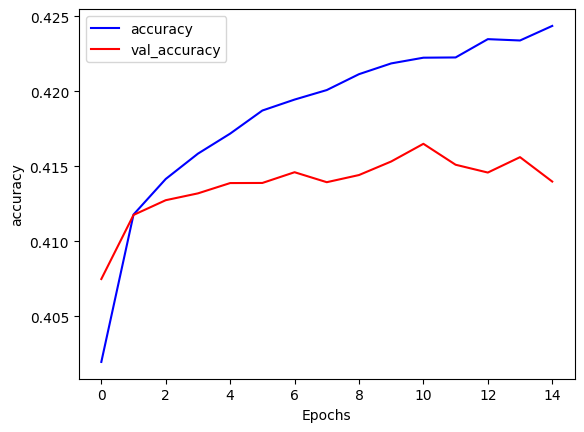

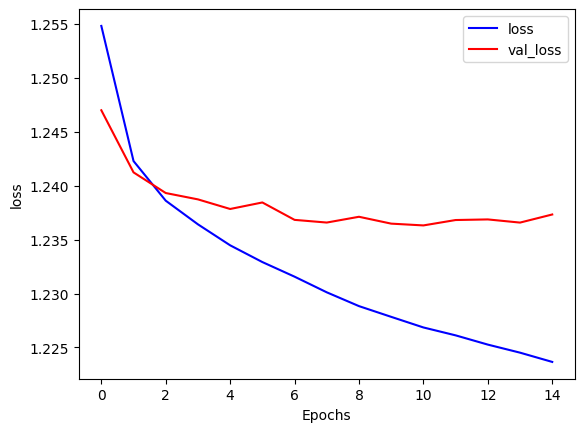

In [ ]:
# Función para graficar
def plot_graphs(history, string):
  plt.plot(history.history[string], color='blue')
  plt.plot(history.history['val_'+string], color='red')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Graficar curvas de loss y accuracy para datos de entrenamiento y validación
plot_graphs(trained, 'accuracy')
plot_graphs(trained, 'loss')

Evaluamos los datos de la particion de test

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

4329/4329 - 9s - loss: 1.2373 - accuracy: 0.4140 - 9s/epoch - 2ms/step

Test accuracy: 0.41398555040359497


Tomamos medidas de rendimiento como lo son el accuracy, precision, recall y f1.


*   **Accuracy score**: es la proporción de muestras correctamente clasificadas respecto al total de muestras (TP+TN)/(P+N)
*   **Precision**: PPV = TP/(TP+FP) o NPV = TN/(TN+FN), para positivos o negativos
*   **Recall**: es la proporcion TP/(TP+FN) es intuitivamente la capacidad del clasificador para encontrar todas las muestras positivas.
*   **F1 score**: es la media armónica de la precisión y la sensibilidad. F1 = 2*(precision * recall)/(precision + recall)



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)

# Calcular los valores de precisión, recall y f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=True)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir los resultados
print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

4329/4329 [==============================] - 15s 3ms/step
Accuracy: 0.41
Precision: 0.40
Recall: 0.41
F1 score: 0.41


In [ ]:
class_names = le.inverse_transform([0,1,2,3])

Calculamos la matriz de confusion.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tabulate import tabulate
#prediction = model.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[21250  2834  6711  4329]
 [ 3700 16267  5193  9437]
 [10312  6357  9039  8616]
 [ 5985 10234  7455 10781]]


Dibujamos la matriz de confusion

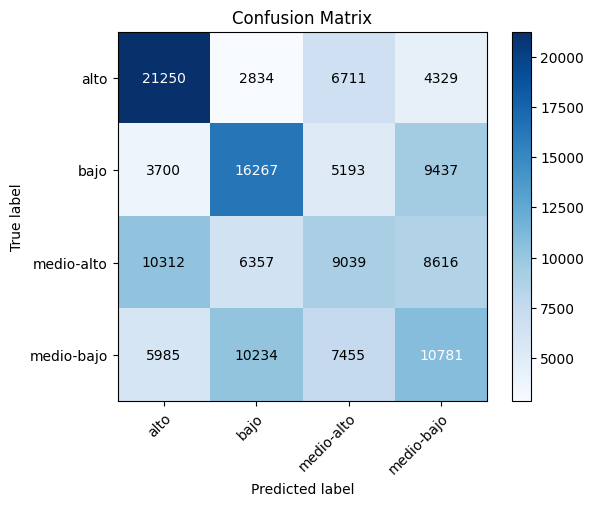

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cnf_matrix.shape[1]),
       yticks=np.arange(cnf_matrix.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       xlabel='Predicted label', ylabel='True label',
       title='Confusion Matrix',
       aspect='equal')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# Loop over data to create annotations
for i in range(cnf_matrix.shape[0]):
    for j in range(cnf_matrix.shape[1]):
        ax.text(j, i, format(cnf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if cnf_matrix[i, j] > cnf_matrix.max() / 2. else "black")

# Show plot
plt.show()

# Bosque


Otro modelo que probaremos es un random forest con 20 como numero de estimadores y un max_depth de 5

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier(n_estimators=20, max_depth=5)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=20)

In [ ]:
max_features_params = [np.round(10**-1 * i, decimals=1) for i in range(1, 3, 1)]
param_grid = {'n_estimators': [2**i for i in range(2, 4, 1)], 'max_features': max_features_params}

In [ ]:
print('Número de árboles: {}'.format(param_grid['n_estimators']))

Número de árboles: [4, 8]


In [ ]:
print('Porcentaje de características a usar: {}'.format(param_grid['max_features']))

Porcentaje de características a usar: [0.1, 0.2]


In [ ]:
from time import time
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [ ]:
start = time()
clf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, verbose=1, n_jobs=-1, cv=2)
clf.fit(X_train, y_train)
print("GridSearchCV tomó {} segundos usando {} configuraciones".format(time() - start,
                                                                         len(clf.cv_results_['params'])))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
GridSearchCV tomó 45.530683279037476 segundos usando 4 configuraciones


In [ ]:
scores = clf.cv_results_['mean_test_score'].reshape(len(param_grid['max_features']),
                                                    len(param_grid['n_estimators']))

In [ ]:
scores

array([[0.34605538, 0.35571916],
       [0.34821989, 0.35921736]])

Se visualizan los parametros

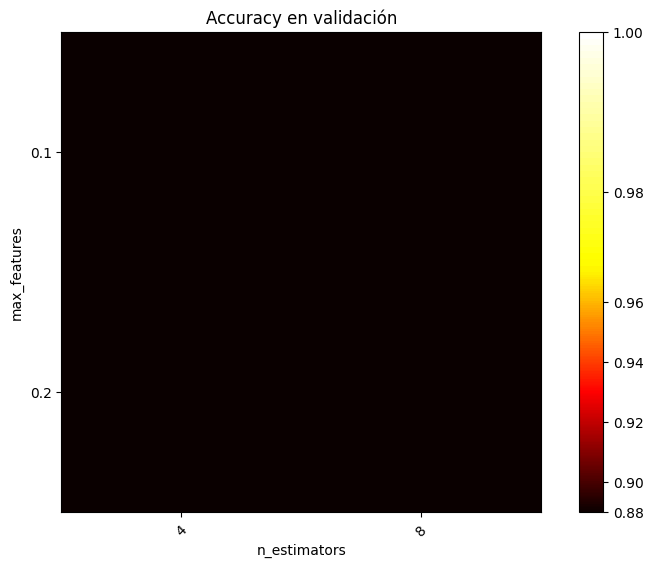

In [ ]:
pl.figure(figsize=(10, 6))
pl.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
pl.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.89, midpoint=0.97, vmax=1.))
pl.xlabel('n_estimators')
pl.ylabel('max_features')
pl.colorbar()
pl.xticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'], rotation=45)
pl.yticks(np.arange(len(param_grid['max_features'])), param_grid['max_features'])
pl.title('Accuracy en validación')
pl.show()

In [ ]:
clf.best_score_

0.3592173574285056

In [ ]:
clf.best_params_

{'max_features': 0.2, 'n_estimators': 8}

In [ ]:
clf.score(X_test, y_test)

0.3611464461758626

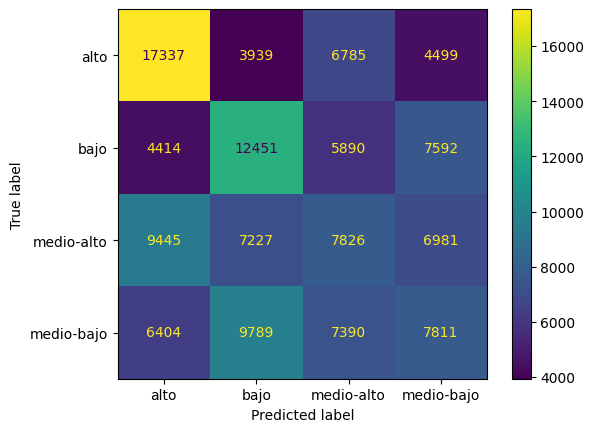

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=clf.predict(X_test)
cm=confusion_matrix(y_test,pred)
cdm= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
cdm.plot()

In [ ]:
from sklearn import metrics
print('Exactitud: {}'.format(metrics.accuracy_score(y_test,pred)))
print('Precision: {}'.format(metrics.precision_score(y_test, pred, average='weighted')))
print('Recall: {}'.format(metrics.recall_score(y_test, pred, average='weighted')))
print('F_1 score: {}'.format(metrics.f1_score(y_test, pred, average='weighted')))

Exactitud: 0.3611464461758626
Precision: 0.3520307041001064
Recall: 0.3611464461758626
F_1 score: 0.35506232039957847


## Otros modelos de clasificación

#### Definir los modelos

En el siguiente bloque de codigo se prueban 4 diferentes modelos haciendo cross validation en cada uno, para asi tener el que mejor accuracy tenga. Los 4 modelos que se tuvieron encuenta fueron:


*   Regresion logistica
*   Analisis discriminante lineal (LDA)
*   Arbol de decision
*   Gaussian Naive Bayes





In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.402820 (0.001998)
LDA: 0.401112 (0.001795)
CART: 0.335155 (0.000273)
NB: 0.312481 (0.003516)


Al ver los resultados se ve que en general el mejor modelo es la red neuronal por lo que escogeremos este modelo para generar el archivo de submission.

# Conclusiones y resultados

Con los resultados obtenidos de los distintos modelos podemos ver que el modelo que mejor se adapta a este dataset es la red neuronal, sin embargo, se puede ver que el accuracy es de solo 0.41, lo que puede implicar varias cosas, hay bastante ruido en las variables de entrada, no hay una correlacion tan directa entre los datos del contexto economico del estudiante y sus resultados en la prueba o en este notebook no se utilizo el modelo correcto o con los hiperparametros adecuados para obtener unos mejores resultados.

# Generación archivo de envío

Al igual que con los datos de train se le hace un preprocesamiento a los datos de test para que estos puedan ser probados en el modelo.

In [ ]:
file_path = '/content/drive/Shareddrives/Inteligentes /test.csv'
df_test = pd.read_csv(file_path)

In [ ]:
id = df_test['ID']
df_test = df_test.drop(columns=["ID"])
df_test.isnull().sum()

In [ ]:
values = {"ESTU_VALORMATRICULAUNIVERSIDAD":"Entre 1 millón y menos de 2.5 millones","ESTU_HORASSEMANATRABAJA":"Más de 30 horas",
          "FAMI_ESTRATOVIVIENDA":"Estrato 2	","FAMI_TIENEINTERNET":"Si","FAMI_EDUCACIONPADRE":"Secundaria (Bachillerato) completa",
          "FAMI_TIENELAVADORA":"Si","FAMI_TIENEAUTOMOVIL":"No","ESTU_PAGOMATRICULAPROPIO":"No","FAMI_TIENECOMPUTADOR":"Si",
          "FAMI_TIENEINTERNET.1":"Si","FAMI_EDUCACIONMADRE":"Secundaria (Bachillerato) completa"}
#df.mode()
#df=df.dropna()
df_test = df_test.fillna(value=values)
df_test['FAMI_TIENEINTERNET'].unique()
df_test.loc[(df_test.FAMI_TIENEINTERNET=='Si'),['FAMI_TIENEINTERNET']] = 1
df_test.loc[(df_test.FAMI_TIENEINTERNET=='No'),['FAMI_TIENEINTERNET']] = 0
df_test.loc[(df_test.FAMI_TIENELAVADORA=='Si'),['FAMI_TIENELAVADORA']] = 1
df_test.loc[(df_test.FAMI_TIENELAVADORA=='No'),['FAMI_TIENELAVADORA']] = 0
df_test.loc[(df_test.FAMI_TIENEAUTOMOVIL=='Si'),['FAMI_TIENEAUTOMOVIL']] = 1
df_test.loc[(df_test.FAMI_TIENEAUTOMOVIL=='No'),['FAMI_TIENEAUTOMOVIL']] = 0
df_test.loc[(df_test.ESTU_PRIVADO_LIBERTAD=='S'),['ESTU_PRIVADO_LIBERTAD']] = 1
df_test.loc[(df_test.ESTU_PRIVADO_LIBERTAD=='N'),['ESTU_PRIVADO_LIBERTAD']] = 0
df_test.loc[(df_test.ESTU_PAGOMATRICULAPROPIO=='Si'),['ESTU_PAGOMATRICULAPROPIO']] = 1
df_test.loc[(df_test.ESTU_PAGOMATRICULAPROPIO=='No'),['ESTU_PAGOMATRICULAPROPIO']] = 0
df_test.loc[(df_test.FAMI_TIENECOMPUTADOR=='Si'),['FAMI_TIENECOMPUTADOR']] = 1
df_test.loc[(df_test.FAMI_TIENECOMPUTADOR=='No'),['FAMI_TIENECOMPUTADOR']] = 0
df_test.loc[(df_test['FAMI_TIENEINTERNET.1']=='Si'),['FAMI_TIENEINTERNET.1']] = 1
df_test.loc[(df_test['FAMI_TIENEINTERNET.1']=='No'),['FAMI_TIENEINTERNET.1']] = 0
df_test

In [ ]:
fe =df_test.groupby("ESTU_PRGM_ACADEMICO").size()
fe_ = fe/len(df_test)
df_test["program_fe"] = df_test["ESTU_PRGM_ACADEMICO"].map(fe_).round(3)
df_test = df_test.drop(columns=['ESTU_PRGM_ACADEMICO'])
df_test

In [ ]:
df_test=pd.get_dummies(df_test)
df_test= scaler.fit_transform(df_test)
df_test

In [ ]:
prediction = model.predict(df_test)

In [ ]:
prediction = np.argmax(prediction, axis=1)
prediction

Se hace una inversa al encode de la columna target y se exporta como csv

In [ ]:
RENDIMIENTO_GLOBAL = le.inverse_transform(prediction)
ID = id
RENDIMIENTO_GLOBAL.ndim, ID.ndim
info = np.stack((ID,RENDIMIENTO_GLOBAL),axis=1)
dfs = pd.DataFrame(info, columns=['ID','RENDIMIENTO_GLOBAL'])
dfs.to_csv('data.csv', index=False)